In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.set_random_seed(42)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


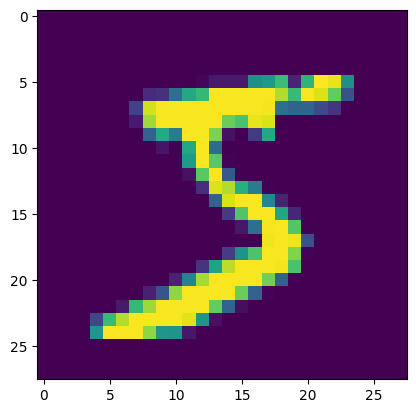

Label: 5


In [3]:
import matplotlib.pyplot as plt
#plt.imshow(x_train[0], cmap = 'gray')
plt.imshow(x_train[0])
plt.show()
print(f'Label: {y_train[0]}')

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
input_shape = (28,28,1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
batch_size = 128
epochs = 15

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7536 - loss: 0.8070 - val_accuracy: 0.9707 - val_loss: 0.0997
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9615 - loss: 0.1271 - val_accuracy: 0.9802 - val_loss: 0.0694
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9710 - loss: 0.0919 - val_accuracy: 0.9835 - val_loss: 0.0590
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9760 - loss: 0.0762 - val_accuracy: 0.9852 - val_loss: 0.0529
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9796 - loss: 0.0648 - val_accuracy: 0.9859 - val_loss: 0.0478
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9806 - loss: 0.0633 - val_accuracy: 0.9868 - val_loss: 0.0460
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9819 - loss: 0.0553 - val_accuracy: 0.9887 - val_loss: 0.0414
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9848 - loss: 0.0492 - val_accu

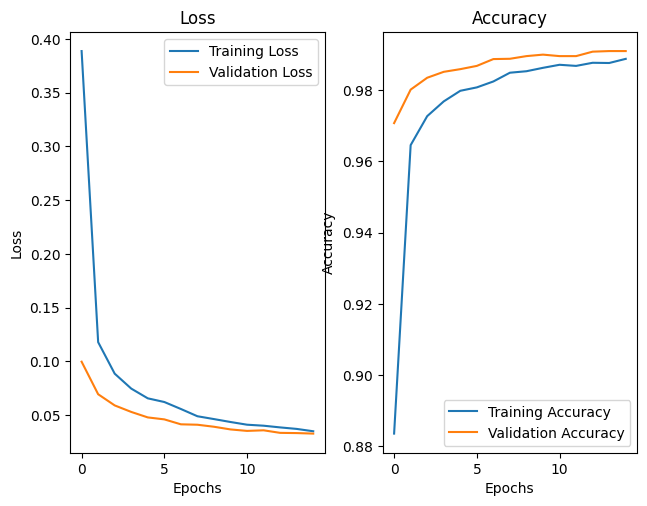

In [8]:
def plot_performance(history):
    flg, ax = plt.subplots(1,2)
    flg.tight_layout()
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss')
    ax[0].plot(train_loss, label='Training Loss')
    ax[0].plot(val_loss, label='Validation Loss')
    ax[0].legend()
    
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].plot(train_acc, label='Training Accuracy')
    ax[1].plot(val_acc, label='Validation Accuracy')
    ax[1].legend()

    plt.show()

plot_performance(history)

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.02587532065808773
Test accuracy 0.9918000102043152


very good performance with loss and accuracy

In [10]:
model_smallest = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.MaxPooling2D(pool_size=(28,28)),
        #layers.AveragePooling2D(pool_size=(28,28)),
        layers.Flatten(), # to prepare the full connect next layers
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_smallest.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_smallest.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_smallest = model_smallest.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0968 - loss: 2.3993 - val_accuracy: 0.0995 - val_loss: 2.3115
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0978 - loss: 2.3068 - val_accuracy: 0.1060 - val_loss: 2.3024
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1159 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.

In [12]:
score = model_smallest.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 2.3011956214904785
Test accuracy 0.11349999904632568


## Model 1 - Aggiungiamo un primo layer convuluzionale

In [13]:
input_shape = (28,28,1)

model_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        # Primo strato convuluzionale
        layers.Conv2D(8, kernel_size=(5,5), activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,338 (20.85 KB)

 Trainable params: 5,338 (20.85 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
batch_size = 128
epochs = 15

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6993 - loss: 1.0771 - val_accuracy: 0.9287 - val_loss: 0.2541
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9286 - loss: 0.2467 - val_accuracy: 0.9539 - val_loss: 0.1753
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9495 - loss: 0.1735 - val_accuracy: 0.9643 - val_loss: 0.1380
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1363 - val_accuracy: 0.9700 - val_loss: 0.1161
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9677 - loss: 0.1135 - val_accuracy: 0.9721 - val_loss: 0.1020
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9717 - loss: 0.0980 - val_accuracy: 0.9745 - val_loss: 0.0924
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0868 - val_accuracy: 0.9755 - val_loss: 0.0856
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9771 - loss: 0.0783 - val_accuracy: 0.

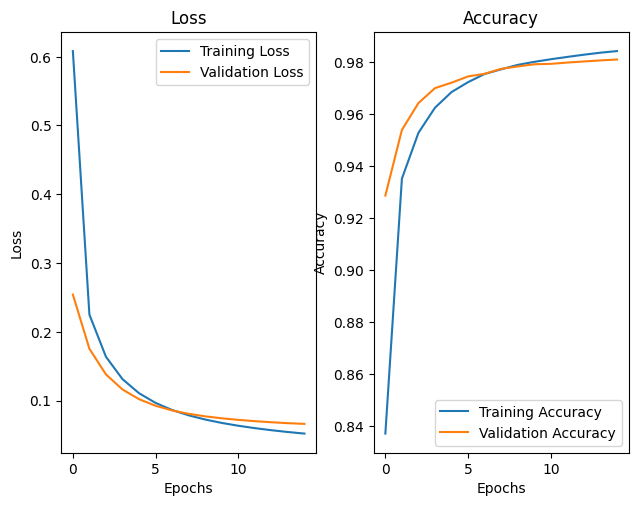

In [15]:
plot_performance(history1)

In [16]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.05736251175403595
Test accuracy 0.9800999760627747


## Model 2 - Aggiungiamo il secondo layer convuluzionale

In [17]:
input_shape = (28,28,1)

model_2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        # Primo strato convuluzionale
        layers.Conv2D(8, kernel_size=(5,5), activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3)),
        
        # Secondo strato convuluzionale
        layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,826 (11.04 KB)

 Trainable params: 2,826 (11.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
batch_size = 128
epochs = 15

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6393 - loss: 1.2338 - val_accuracy: 0.9440 - val_loss: 0.1930
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9407 - loss: 0.1925 - val_accuracy: 0.9600 - val_loss: 0.1346
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9580 - loss: 0.1385 - val_accuracy: 0.9666 - val_loss: 0.1125
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9641 - loss: 0.1144 - val_accuracy: 0.9699 - val_loss: 0.1001
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9689 - loss: 0.0998 - val_accuracy: 0.9727 - val_loss: 0.0917
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9717 - loss: 0.0896 - val_accuracy: 0.9754 - val_loss: 0.0853
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9744 - loss: 0.0819 - val_accuracy: 0.9772 - val_loss: 0.0800
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9766 - loss: 0.0758 - val_accuracy: 0.

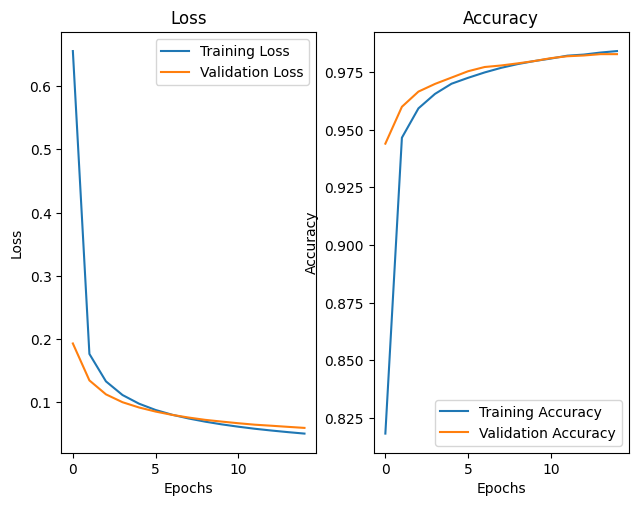

In [19]:
plot_performance(history2)

In [20]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.051163773983716965
Test accuracy 0.9857000112533569


## Model 3 - Aggiungiamo il terzo layer convuluzionale

In [42]:
input_shape = (28,28,1)

model_3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        # Primo layer convuluzionale
        layers.Conv2D(8, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        
        # Secondo layer convuluzionale
        layers.Conv2D(12, kernel_size=(4,4), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # Terzo layer convuluzionale
        layers.Conv2D(16, kernel_size=(4,4), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_3.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 10, 10, 12)     │         1,548 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 5, 5, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 2, 2, 16)       │         3,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,886 (19.09 KB)

 Trainable params: 4,886 (19.09 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
batch_size = 128
epochs = 15

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5824 - loss: 1.2850 - val_accuracy: 0.9358 - val_loss: 0.2158
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9374 - loss: 0.2094 - val_accuracy: 0.9584 - val_loss: 0.1455
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9546 - loss: 0.1463 - val_accuracy: 0.9642 - val_loss: 0.1228
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9636 - loss: 0.1184 - val_accuracy: 0.9683 - val_loss: 0.1091
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9678 - loss: 0.1024 - val_accuracy: 0.9714 - val_loss: 0.0997
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9711 - loss: 0.0909 - val_accuracy: 0.9728 - val_loss: 0.0911
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9744 - loss: 0.0823 - val_accuracy: 0.9747 - val_loss: 0.0836
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9758 - loss: 0.0759 - val_accuracy: 0.

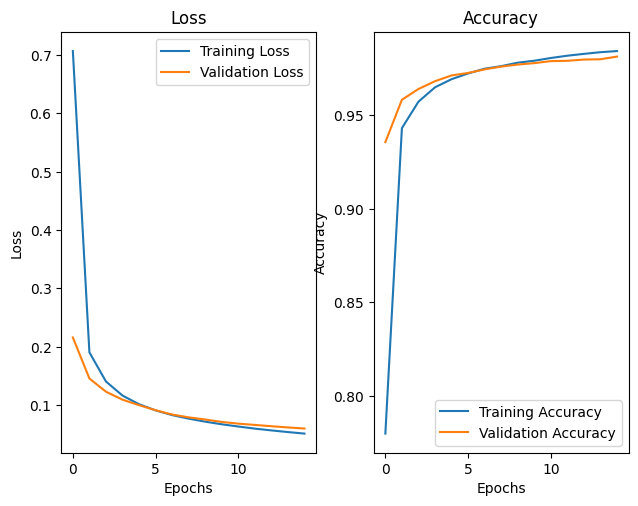

In [44]:
plot_performance(history3)

In [45]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.05625557154417038
Test accuracy 0.9818999767303467


## Model 4 - Add Fully connected

In [51]:
input_shape = (28,28,1)

model_4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        # Primo strato convuluzionale
        layers.Conv2D(8, kernel_size=(5,5), activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3)),
        
        # Secondo strato convuluzionale
        layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_4.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_63 (Conv2D)              │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 6, 6, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,346 (24.79 KB)

 Trainable params: 6,346 (24.79 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
batch_size = 128
epochs = 15

model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history4 = model_4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6114 - loss: 1.2376 - val_accuracy: 0.9439 - val_loss: 0.1904
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9423 - loss: 0.1896 - val_accuracy: 0.9627 - val_loss: 0.1277
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9601 - loss: 0.1313 - val_accuracy: 0.9674 - val_loss: 0.1100
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9666 - loss: 0.1081 - val_accuracy: 0.9712 - val_loss: 0.0966
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9705 - loss: 0.0937 - val_accuracy: 0.9740 - val_loss: 0.0881
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9736 - loss: 0.0831 - val_accuracy: 0.9762 - val_loss: 0.0816
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9763 - loss: 0.0756 - val_accuracy: 0.9774 - val_loss: 0.0766
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9783 - loss: 0.0694 - val_accuracy: 0.

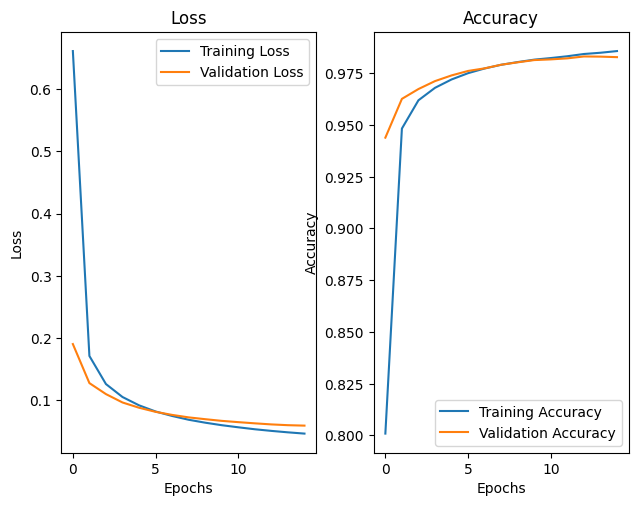

In [53]:
plot_performance(history4)

In [54]:
score = model_4.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.047353748232126236
Test accuracy 0.986299991607666


## Model 5 - Due layer fully connected

In [59]:
input_shape = (28,28,1)

model_5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        # Primo strato convuluzionale
        layers.Conv2D(8, kernel_size=(5,5), activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3)),
        
        # Secondo strato convuluzionale
        layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_5.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_67 (Conv2D)              │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 6, 6, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,714 (26.23 KB)

 Trainable params: 6,714 (26.23 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
batch_size = 128
epochs = 15

model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history5 = model_5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3444 - loss: 1.7704 - val_accuracy: 0.9226 - val_loss: 0.3884
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6746 - loss: 0.8618 - val_accuracy: 0.9428 - val_loss: 0.2213
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7413 - loss: 0.6862 - val_accuracy: 0.9507 - val_loss: 0.1809
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7695 - loss: 0.6118 - val_accuracy: 0.9582 - val_loss: 0.1521
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7958 - loss: 0.5370 - val_accuracy: 0.9654 - val_loss: 0.1268
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8091 - loss: 0.5066 - val_accuracy: 0.9679 - val_loss: 0.1177
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8239 - loss: 0.4707 - val_accuracy: 0.9688 - val_loss: 0.1071
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8362 - loss: 0.4400 - val_accuracy: 0.

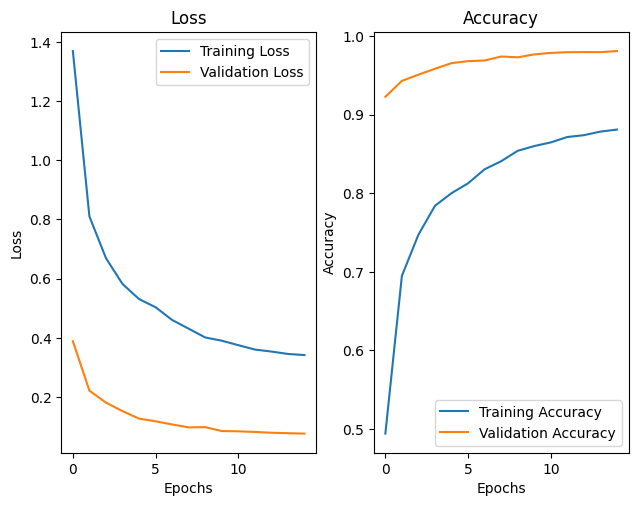

In [61]:
plot_performance(history5)

In [62]:
score = model_5.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.06750872731208801
Test accuracy 0.9825999736785889
